In [8]:
import numpy as np
import seaborn as sns
import pandas
import matplotlib.pyplot as plt

SCENARIO 1 - SEARCH GRID DATA

n Components Data

In [9]:
prep = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\prep.npy")
auto_reject = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\autorej.npy")
mine = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\mine.npy")
base_line = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\base_line.npy")

% channels excluded data

In [10]:
prep_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\prep_ex.npy")
auto_reject_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\autorej_ex.npy")
mine_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\mine_ex.npy")

Create CSV for linear modelling in R

In [11]:
df = pandas.DataFrame()
df['DataPoint'] = np.char.add(np.tile(np.arange(0, 56, 1), 4).astype(str), "sub")
df['Treatment'] = np.repeat(["AutoReject", "AAMine", "PREP", "NoneTreated"], 56)
df['ComponentIncrease'] = np.concatenate((auto_reject, mine, prep, base_line))
df.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\df", index=False)

Create CSV for modified tukey additivity test in R

In [12]:
for_turkey_search = pandas.DataFrame()
for_turkey_search["1"] = base_line
for_turkey_search["2"] = mine
for_turkey_search["3"] = auto_reject
for_turkey_search["4"] = prep
for_turkey_search.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\for_turkey_search", index=False)

Boxplot of the change in n componenets caused by algorithm processing

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\4219372289.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


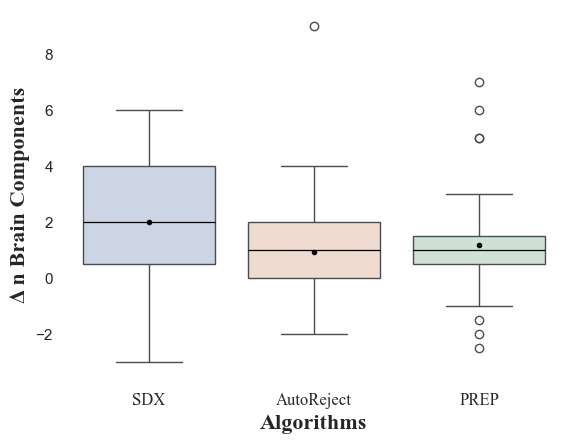

In [13]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
style['font'] = "Times New Roman"
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[(mine-base_line).flatten(), (auto_reject-base_line).flatten(), (prep-base_line).flatten()], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(u'Δ' + " n Brain Components", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\search_increase")
plt.show()

Boxplot of excluded channels

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\3637016468.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


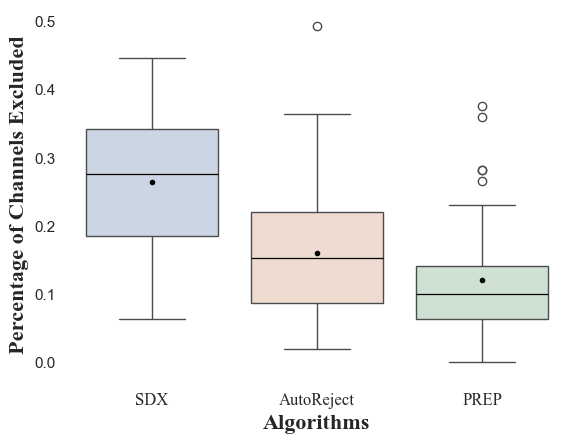

In [14]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[mine_ex, auto_reject_ex, prep_ex], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(r"Percentage of Channels Excluded", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\search_ex")
plt.show()

In [15]:
print(np.mean(mine_ex))
print(np.mean(auto_reject_ex))
print(np.mean(prep_ex))

0.2638090968969555
0.16015625
0.12025669642857142


Correlation testing

In [16]:
from scipy.stats import pearsonr 
print(pearsonr(np.sqrt(base_line), np.sqrt(mine)))
print(pearsonr(np.sqrt(base_line), np.sqrt(auto_reject)))
print(pearsonr(np.sqrt(base_line), np.sqrt(prep)))
print(pearsonr(np.sqrt(prep), np.sqrt(mine)))
print(pearsonr(np.sqrt(prep), np.sqrt(auto_reject)))
print(pearsonr(np.sqrt(auto_reject), np.sqrt(mine)))

PearsonRResult(statistic=0.7286109434341476, pvalue=1.9473537267360697e-10)
PearsonRResult(statistic=0.8434590136306156, pvalue=3.4012432183109255e-16)
PearsonRResult(statistic=0.8104262012403273, pvalue=3.8119779613549823e-14)
PearsonRResult(statistic=0.828225890634638, pvalue=3.3944125165853905e-15)
PearsonRResult(statistic=0.8548731522931035, pvalue=5.136786060622351e-17)
PearsonRResult(statistic=0.8286637679967394, pvalue=3.187317919907151e-15)


SCENARIO 2 - SEARCH GRID DATA

n Components Data

In [17]:
prep_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\prep.npy")
auto_reject_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\autorej.npy")
mine_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\mine.npy")
base_line_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\base_line.npy")

In [18]:
print(prep_art)
print(auto_reject_art)

[3.5 1.5 2.5 2.5 3.5 0.5 1.  1.  2.  5.5 6.5 1.5 0.5 1.5 2.5 2.5 0.  0.
 0.  2.  1.  0.  1.  1.  0.  0.  3.  0.  1.  0.  1.  0.  0.5 0.  0.5 0.
 0.  0.  0.5 0.  3.5 0.  1.5 4.  3.  0.  5.5 0.5 1.  7.  3.5 1.5 2.5 2.
 1.5 0. ]
[4.  2.  4.5 4.  3.  0.5 0.5 3.  2.  4.5 4.  2.  1.  5.  6.  2.  1.  1.
 0.  2.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.5 0.  0.5 0.5
 0.  1.  0.5 0.  4.5 0.5 2.  3.5 4.  3.  5.5 0.5 5.5 8.  2.5 2.5 3.  1.5
 3.  2. ]


% channels excluded data

In [19]:
prep_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\prep_ex.npy")
auto_reject_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\autorej_ex.npy")
mine_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\mine_ex.npy")

Create CSV for linear modelling in R

In [20]:
df = pandas.DataFrame()
df['DataPoint'] = np.char.add(np.tile(np.arange(0, 56, 1), 4).astype(str), "sub")
df['Treatment'] = np.repeat(["AutoReject", "AAMine", "PREP", "NoneTreated"], 56)
df['ComponentIncrease'] = np.concatenate((auto_reject_art, mine_art, prep_art, base_line_art))
df.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\df", index=False)

Create CSV for modified tukey additivity test in R

In [21]:
for_turkey_search_art = pandas.DataFrame()
for_turkey_search_art["1"] = base_line_art
for_turkey_search_art["2"] = mine_art
for_turkey_search_art["3"] = auto_reject_art
for_turkey_search_art["4"] = prep_art
for_turkey_search_art.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\for_turkey_search_art", index=False)

Boxplot of the change in n componenets caused by algorithm processing

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\2955864121.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


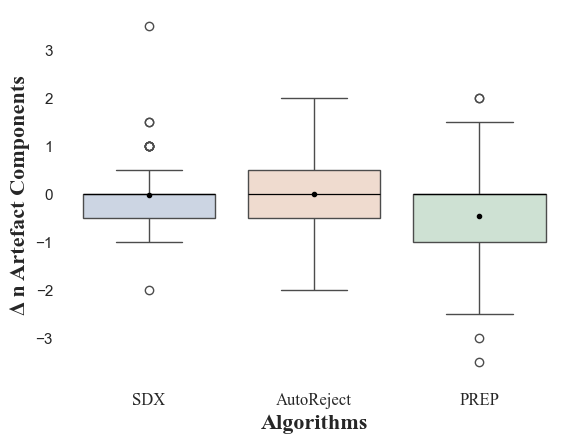

In [22]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[(mine_art-base_line_art).flatten(), (auto_reject_art-base_line_art).flatten(), (prep_art-base_line_art).flatten()], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(u'Δ' + " n Artefact Components", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\search_art_increase")
plt.show()

Boxplot of excluded channels

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\3717136203.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


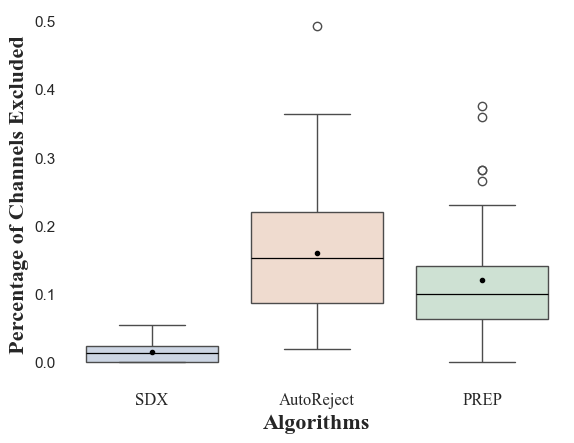

In [23]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[mine_art_ex, auto_reject_ex, prep_ex], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(r"Percentage of Channels Excluded", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\search_art_ex")
plt.show()

In [24]:
print(np.mean(mine_art_ex))
print(np.mean(auto_reject_art_ex))
print(np.mean(prep_art_ex))

0.014002351068501173
0.11823381696428571
0.12025669642857142


Correlation testing

In [25]:
from scipy.stats import pearsonr 
print(pearsonr(base_line_art, mine_art))
print(pearsonr(base_line_art, auto_reject_art))
print(pearsonr(base_line_art, prep_art))
print(pearsonr(prep_art, mine_art))
print(pearsonr(prep_art, auto_reject_art))
print(pearsonr(auto_reject_art, mine_art))

PearsonRResult(statistic=0.8994833997351789, pvalue=4.5867645790953016e-21)
PearsonRResult(statistic=0.8786948790117567, pvalue=5.578137480948567e-19)
PearsonRResult(statistic=0.798427078626729, pvalue=1.6942034449047187e-13)
PearsonRResult(statistic=0.8067149169310575, pvalue=6.113894083798122e-14)
PearsonRResult(statistic=0.7675773855836192, pvalue=5.15335198730468e-12)
PearsonRResult(statistic=0.8364753500052539, pvalue=1.0054373251993735e-15)


SCENARIO 1 - MPI LEMON DATA

n Components Data

In [26]:
prep_mpi = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\prep.npy")
auto_reject_mpi = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\autorej.npy")
mine_mpi = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\mine.npy")
base_line_mpi = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\base_line.npy")

% channels excluded data

In [27]:
prep_mpi_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\prep_ex.npy")
auto_reject_mpi_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\autorej_ex.npy")
mine_mpi_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\mine_ex.npy")

Create CSV for linear modelling in R

In [28]:
mpi_df = pandas.DataFrame()
mpi_df['DataPoint'] = np.char.add(np.tile(np.arange(0, 197, 1), 4).astype(str), "sub")
mpi_df['Treatment'] = np.repeat(["AutoReject", "AAMine", "PREP", "NoneTreated"], 197)
mpi_df['ComponentIncrease'] = np.concatenate((auto_reject_mpi, mine_mpi, prep_mpi, base_line_mpi))
mpi_df.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_2\df", index=False)

Create CSV for modified tukey additivity test in R

In [29]:
for_turkey_mpi = pandas.DataFrame()
for_turkey_mpi["1"] = base_line_mpi
for_turkey_mpi["2"] = mine_mpi
for_turkey_mpi["3"] = auto_reject_mpi
for_turkey_mpi["4"] = prep_mpi
for_turkey_mpi.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\for_turkey_mpi", index=False)

Boxplot of the change in n componenets caused by algorithm processing

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\3410310496.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


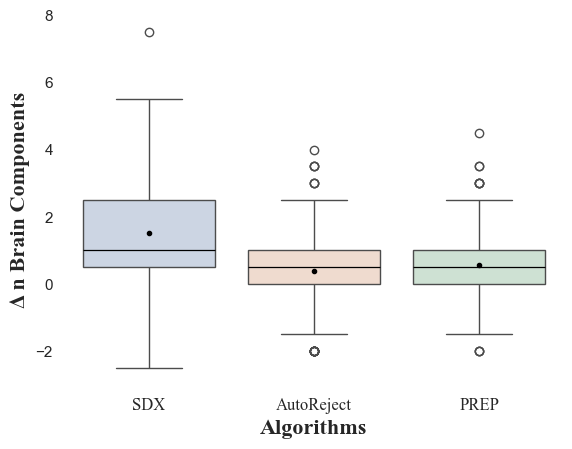

In [30]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[(mine_mpi-base_line_mpi).flatten(), (auto_reject_mpi-base_line_mpi).flatten(), (prep_mpi-base_line_mpi).flatten()], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(u'Δ' + " n Brain Components", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_increase")
plt.show()

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\135299938.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


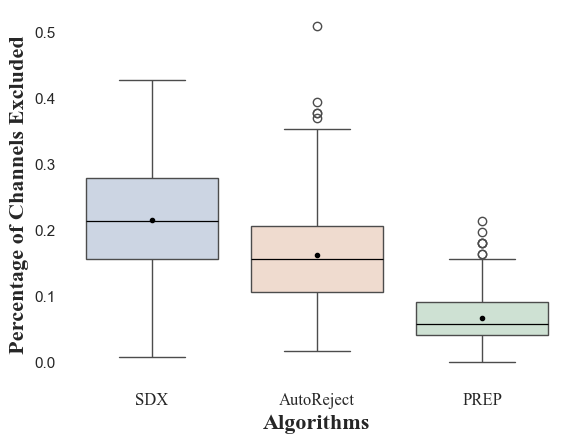

In [31]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[mine_mpi_ex, auto_reject_mpi_ex, prep_mpi_ex], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(r"Percentage of Channels Excluded", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_ex")
plt.show()

In [32]:
print(np.mean(mine_mpi_ex))
print(np.mean(auto_reject_mpi_ex))
print(np.mean(prep_mpi_ex))

0.214529416659732
0.1619788632770242
0.06723807938753434


Correlation testing

In [33]:
from scipy.stats import pearsonr 
print(pearsonr(np.sqrt(base_line_mpi), np.sqrt(mine_mpi)))
print(pearsonr(np.sqrt(base_line_mpi), np.sqrt(auto_reject_mpi)))
print(pearsonr(np.sqrt(base_line_mpi), np.sqrt(prep_mpi)))
print(pearsonr(np.sqrt(prep_mpi), np.sqrt(mine_mpi)))
print(pearsonr(np.sqrt(prep_mpi), np.sqrt(auto_reject_mpi)))
print(pearsonr(np.sqrt(auto_reject_mpi), np.sqrt(mine_mpi)))

PearsonRResult(statistic=0.8137150416553192, pvalue=7.89938144768668e-48)
PearsonRResult(statistic=0.8890845085548431, pvalue=4.247085064624367e-68)
PearsonRResult(statistic=0.9066444911190567, pvalue=5.168875121960487e-75)
PearsonRResult(statistic=0.8391327836026, pvalue=1.827997332283399e-53)
PearsonRResult(statistic=0.8646816244755114, pvalue=3.2360249839771214e-60)
PearsonRResult(statistic=0.8145378462172027, pvalue=5.3570189898661983e-48)


SCENARIO 2 - MPI LEMON DATA

n Components Data

In [34]:
prep_mpi_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\prep.npy")
auto_reject_mpi_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\autorej.npy")
mine_mpi_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\mine.npy")
base_line_mpi_art = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\base_line.npy")

% channels excluded data

In [35]:
prep_mpi_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\prep_ex.npy")
auto_reject_mpi_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\autorej_ex.npy")
mine_mpi_art_ex = np.load(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\mine_ex.npy")

Create CSV for generalized linear modelling in R

In [36]:
mpi_df = pandas.DataFrame()
mpi_df['DataPoint'] = np.char.add(np.tile(np.arange(0, 197, 1), 4).astype(str), "sub")
mpi_df['Treatment'] = np.repeat(["AutoReject", "AAMine", "PREP", "NoneTreated"], 197)
mpi_df['ComponentIncrease'] = np.concatenate((auto_reject_mpi_art, mine_mpi_art, prep_mpi_art, base_line_mpi_art))
mpi_df.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_2_art\df", index=False)

In [37]:
print(mpi_df)

    DataPoint    Treatment  ComponentIncrease
0        0sub   AutoReject                3.0
1        1sub   AutoReject                1.5
2        2sub   AutoReject                3.5
3        3sub   AutoReject                3.5
4        4sub   AutoReject                3.0
..        ...          ...                ...
783    192sub  NoneTreated                0.5
784    193sub  NoneTreated                1.0
785    194sub  NoneTreated                1.0
786    195sub  NoneTreated                1.5
787    196sub  NoneTreated                3.0

[788 rows x 3 columns]


Create CSV for modified tukey additivity test in R

In [38]:
for_turkey_mpi_art = pandas.DataFrame()
for_turkey_mpi_art["1"] = base_line_mpi_art
for_turkey_mpi_art["2"] = mine_mpi_art
for_turkey_mpi_art["3"] = auto_reject_mpi_art
for_turkey_mpi_art["4"] = prep_mpi_art
for_turkey_mpi_art.to_csv(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\for_turkey_mpi_art", index=False)

Boxplot of the change in n componenets caused by algorithm processing

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\3211939001.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


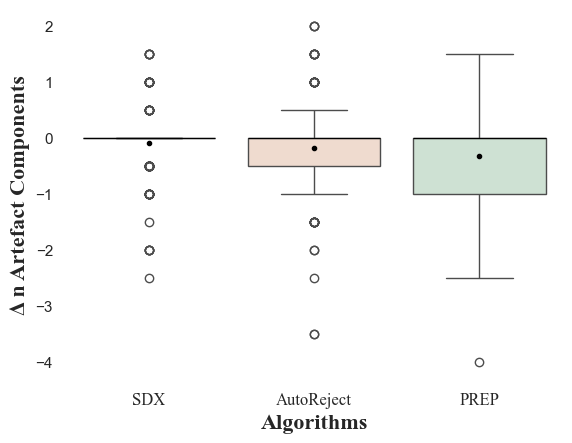

In [39]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=[(mine_mpi_art-base_line_mpi_art).flatten(), (auto_reject_mpi_art-base_line_mpi_art).flatten(), (prep_mpi_art-base_line_mpi_art).flatten()], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(u'Δ' + " n Artefact Components", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_art_increase")
plt.show()

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\188608669.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")


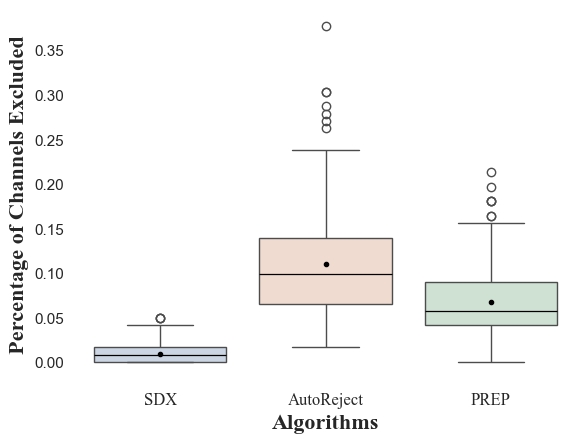

In [40]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

ax = sns.boxplot(data=[mine_mpi_art_ex, auto_reject_mpi_art_ex, prep_mpi_art_ex], medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"})
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'], font="Times New Roman")
ax.set_ylabel(r"Percentage of Channels Excluded", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 16, "font":"Times New Roman"})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_art_ex")
plt.show()

In [41]:
print(np.mean(mine_mpi_art_ex))
print(np.mean(auto_reject_mpi_art_ex))
print(np.mean(prep_mpi_art_ex))

0.00940334526088042
0.10976117167346261
0.06723807938753434


Correlation testing

In [42]:
from scipy.stats import pearsonr 
print(pearsonr(base_line_mpi_art, mine_mpi_art))
print(pearsonr(base_line_mpi_art, auto_reject_mpi_art))
print(pearsonr(base_line_mpi_art, prep_mpi_art))
print(pearsonr(prep_mpi_art, mine_mpi_art))
print(pearsonr(prep_mpi_art, auto_reject_mpi_art))
print(pearsonr(auto_reject_mpi_art, mine_mpi_art))

PearsonRResult(statistic=0.8887994736518058, pvalue=5.376700382414907e-68)
PearsonRResult(statistic=0.7792516245844169, pvalue=1.9562538356046035e-41)
PearsonRResult(statistic=0.756107537062058, pvalue=9.36959820931887e-38)
PearsonRResult(statistic=0.773772292515767, pvalue=1.592371701575055e-40)
PearsonRResult(statistic=0.775823878038119, pvalue=7.313207060102243e-41)
PearsonRResult(statistic=0.7815371247486085, pvalue=8.013893890664931e-42)


Pooled box plots for MPI lemon

In [43]:
v1 = np.concatenate((mine_mpi_ex, auto_reject_mpi_ex, prep_mpi_ex))
v2 = np.concatenate((mine_mpi_art_ex, auto_reject_mpi_art_ex, prep_mpi_art_ex))
print(np.concatenate((v1, v2)).size)

1182


In [44]:
v1 = np.concatenate((mine_mpi_ex, auto_reject_mpi_ex, prep_mpi_ex))
v2 = np.concatenate((mine_mpi_art_ex, auto_reject_mpi_art_ex, prep_mpi_art_ex))
mpi_ex = pandas.DataFrame()
mpi_ex["Values"] = np.concatenate((v1, v2))
mpi_ex["Algorithm"] = np.tile(np.repeat(["SDX", "AutoReject", "PREP"], 197), 2)
mpi_ex["Scenario"] = np.repeat([1, 2], 591)

In [45]:
print(mpi_ex)

        Values Algorithm  Scenario
0     0.213115       SDX         1
1     0.245902       SDX         1
2     0.352459       SDX         1
3     0.237705       SDX         1
4     0.319672       SDX         1
...        ...       ...       ...
1177  0.049180      PREP         2
1178  0.090164      PREP         2
1179  0.040984      PREP         2
1180  0.040984      PREP         2
1181  0.090164      PREP         2

[1182 rows x 3 columns]


C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\4036569236.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.boxplot(data=mpi_ex, y="Values", x="Algorithm", hue="Scenario", medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"}, palette=sns.color_palette())
C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\4036569236.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'])


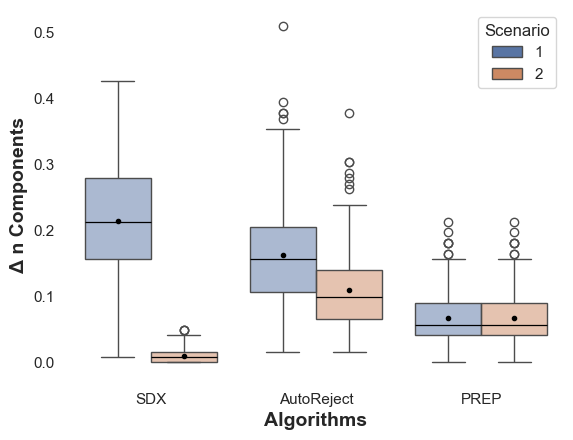

In [46]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=mpi_ex, y="Values", x="Algorithm", hue="Scenario", medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"}, palette=sns.color_palette())
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'])
ax.set_ylabel(u'Δ' + " n Components", fontdict={'weight' : 'bold', 'size' : 14})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 14})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_ex")
plt.show()

C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\1142360124.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.boxplot(data=mpi_ex, y="Values", x="Algorithm", hue="Scenario", medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"}, palette=sns.color_palette())
C:\Users\workbench\AppData\Local\Temp\ipykernel_19208\1142360124.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'])


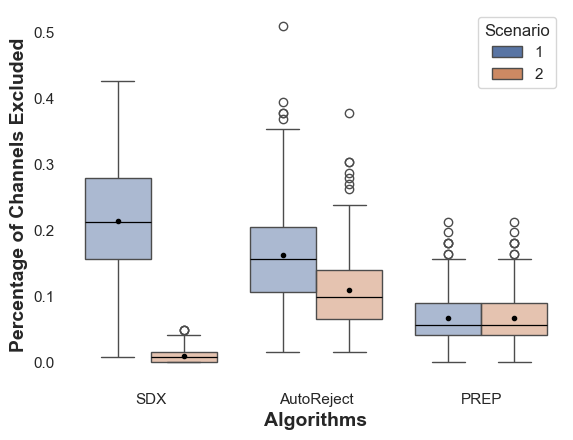

In [47]:
sns.set_theme(style="white")
style = sns.axes_style()
style['axes.spines.top'] = False
style['axes.spines.right'] = False
style['axes.spines.bottom'] = False
style['axes.spines.left'] = False
sns.set_theme(style=style)

style['axes.spines.right'] = False
ax = sns.boxplot(data=mpi_ex, y="Values", x="Algorithm", hue="Scenario", medianprops={"color":"black", "linewidth":0.9} , showmeans=True, meanprops={"marker": "o","markeredgecolor": "black",'markerfacecolor':'black', "markersize": "3"}, palette=sns.color_palette())
ax.set_xticklabels(['SDX', 'AutoReject', 'PREP'])
ax.set_ylabel(r"Percentage of Channels Excluded", fontdict={'weight' : 'bold', 'size' : 14})
ax.set_xlabel("Algorithms", fontdict={'weight' : 'bold', 'size' : 14})

for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))

plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\mpi_increase")
plt.show()